In [37]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import integrate

In [55]:
h=6.62607004e-34 #Planck's constant
kb=1.38064852e-23 #Boltzmann's constant
c=3.0e8           #speed of light

N=1000000           #number of integration steps



In [56]:
#Defining function within the integral
def f(x):
    return x**3/(math.e**x-1)

## Defining Function that gives the efficiency as a function of T
def efficiency(T):
    a=h*c/(750e-9*kb*T)  #lower bound of integral
    b=h*c/(450e-9*kb*T)  #upper bound of integral
    
    def Simpson():
        h=(b-a)/N
        s=f(a)+f(b)
        for k in range(1,int(N)):
            if (k%2!=0):
                s+=4*f(a+k*h)
            else:
                s+=2*f(a+k*h)
        return 1/3*h*s
    
    return 15/math.pi**4*Simpson()
    

In [61]:
Ts=np.linspace(300,10000,20)   #Range of temperatures
effs=np.zeros(len(Ts))         #Initializing array for efficiency as a function of temperature


#Calculating Efficiency as a function of Temperature
for i in range(len(Ts)):
    T=Ts[i]
    effs[i]=efficiency(T)
    

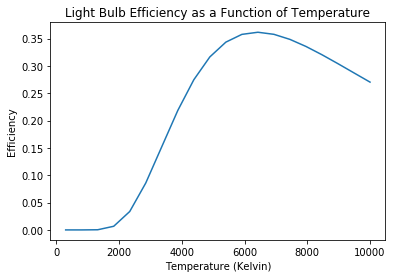

In [65]:
plt.plot(Ts,effs)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Efficiency")
plt.title("Light Bulb Efficiency as a Function of Temperature")
plt.savefig("dead")

In [69]:
#Finding and Outputting the maximum efficiency Temperature

for xx, yy in zip(Ts, effs):
    if yy==max(effs):
        print("The temperature at maximum efficiency is: "+str(xx)+" Kelvin")

The temperature at maximum efficiency is: 6426.315789473684 Kelvin
